C:\Users\luism\AppData\Local\Temp\ipykernel_4344\2706151471.py:20: UserWarning: Argument(s) 'var_limit' are not valid for transform GaussNoise
  A.GaussNoise(var_limit=(10.0, 50.0), p=1.0),


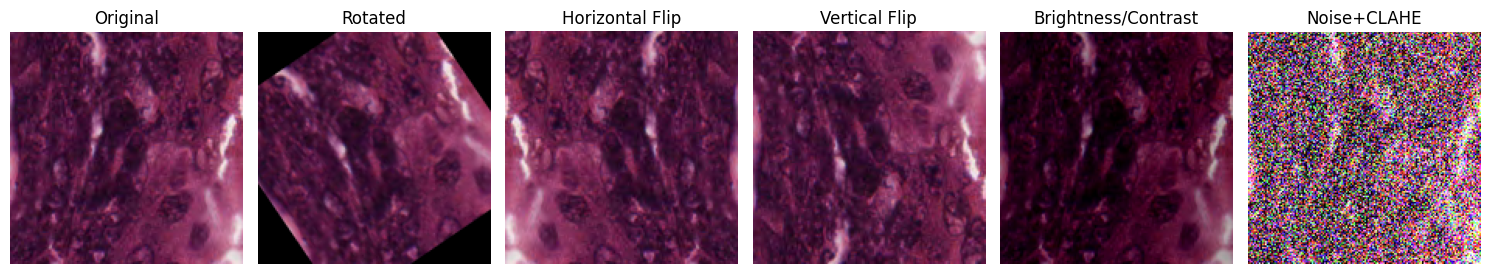

Images saved in: C:\Users\luism\Intelligent agents\Colorectar Cancer\augmented_samples


In [5]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import albumentations as A

# --- Constants ---
DATA_DIR = 'Kather_texture_2016_image_tiles_5000'
OUTPUT_DIR = 'augmented_samples'
os.makedirs(OUTPUT_DIR, exist_ok=True)

# --- Define Augmentation Pipeline ---
# Five distinct augmentations to match preprocess.ipynb
augmentations = [
    A.Rotate(limit=(0, 360), p=1.0),  # Random rotation 0°–360°
    A.HorizontalFlip(p=1.0),           # Horizontal flip
    A.VerticalFlip(p=1.0),             # Vertical flip
    A.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0.2, p=1.0),  # Brightness/contrast adjustment
    A.Compose([                        # Gaussian noise + CLAHE
        A.GaussNoise(var_limit=(10.0, 50.0), p=1.0),
        A.CLAHE(clip_limit=4.0, p=1.0)
    ])
]

# --- Load a Sample Image ---
# Select the first .tif image from the dataset
image_files = ["01_TUMOR/1A11_CRC-Prim-HE-07_022.tif_Row_601_Col_151.tif"]
if not image_files:
    raise FileNotFoundError(f"No .tif files found in {DATA_DIR}")
image_path = os.path.join(DATA_DIR, image_files[0])
image = cv2.imread(image_path)
if image is None:
    raise FileNotFoundError(f"Could not load image: {image_path}")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

# --- Generate Augmented Images ---
augmented_images = [image]  # Start with the original image
for i, aug in enumerate(augmentations):
    transformed = aug(image=image)
    augmented_images.append(transformed['image'])

# --- Visualize and Save Images ---
fig, axes = plt.subplots(1, 6, figsize=(15, 3))
titles = ['Original', 'Rotated', 'Horizontal Flip', 'Vertical Flip', 'Brightness/Contrast', 'Noise+CLAHE']
for i, (img, title) in enumerate(zip(augmented_images, titles)):
    axes[i].imshow(img)
    axes[i].set_title(title)
    axes[i].axis('off')
    # Save each image
    save_path = os.path.join(OUTPUT_DIR, f'sample_{title.lower().replace(" ", "_")}.png')
    cv2.imwrite(save_path, cv2.cvtColor(img, cv2.COLOR_RGB2BGR))

plt.tight_layout()
plt.show()

print(f"Images saved in: {os.path.abspath(OUTPUT_DIR)}")